Assignment No 6 - Data Visualization

Name - Priyanka Maru

Student Id - 202091536

In [139]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from matplotlib.gridspec import GridSpec


In [141]:
df_fuel = pd.read_csv('fuel-efficiency.csv')
df_fuel

,month,efficiency
0,1,10.420545
1,2,10.691178
2,3,10.593444
3,4,9.467789
4,5,8.367721
5,6,8.582881
6,7,6.760700
7,8,7.709470
8,9,8.724014
9,10,8.892976


In [142]:
df_students = pd.read_csv('students.csv')
df_students

,Province,Total students,Population
0,Alberta,200382.0,4262635
1,British Columbia,295488.0,5000879
2,Manitoba,63183.0,1342153
3,New Brunswick,26733.0,775610
4,Newfoundland and Labrador,24777.0,510550
5,Nova Scotia,54501.0,969383
6,Ontario,889287.0,14223942
7,Prince Edward Island,7428.0,154331
8,Quebec,530340.0,8501833
9,Saskatchewan,59157.0,1132505


QUESTION NO 1

In [143]:
# Create the radar chart
months =['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
fig = px.line_polar(df_fuel, r='efficiency', theta=months,range_r=[0, 12],line_shape='spline',direction='clockwise',line_close=True)
fig.update_traces(fill='none')
# Show the plot
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



QUESTION NO 2

In [144]:
# Load data
canada_map = gpd.read_file('canada.shp')
canada_map

,Province,geometry
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095..."
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274..."
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748..."
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786..."
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007..."
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918..."
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385..."
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477..."
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760..."
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867..."


In [145]:
# Merge data
merged_data = canada_map.merge(df_students,on="Province",how="left")
merged_data

,Province,geometry,Total students,Population
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",24777.0,510550.0
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274...",7428.0,154331.0
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748...",54501.0,969383.0
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786...",26733.0,775610.0
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",530340.0,8501833.0
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918...",889287.0,14223942.0
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385...",63183.0,1342153.0
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477...",59157.0,1132505.0
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760...",200382.0,4262635.0
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867...",295488.0,5000879.0


In [146]:
# Calculate the percentage of students
merged_data['percentage'] = merged_data['Total students'] / merged_data['Population'] * 100
merged_data

,Province,geometry,Total students,Population,percentage
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",24777.0,510550.0,4.853002
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274...",7428.0,154331.0,4.813032
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748...",54501.0,969383.0,5.622236
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786...",26733.0,775610.0,3.446706
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",530340.0,8501833.0,6.237949
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918...",889287.0,14223942.0,6.252043
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385...",63183.0,1342153.0,4.707585
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477...",59157.0,1132505.0,5.223553
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760...",200382.0,4262635.0,4.700895
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867...",295488.0,5000879.0,5.908721


In [147]:
merged_data=merged_data[['Province','geometry','percentage']]
merged_data

,Province,geometry,percentage
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",4.853002
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274...",4.813032
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748...",5.622236
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786...",3.446706
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",6.237949
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918...",6.252043
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385...",4.707585
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477...",5.223553
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760...",4.700895
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867...",5.908721


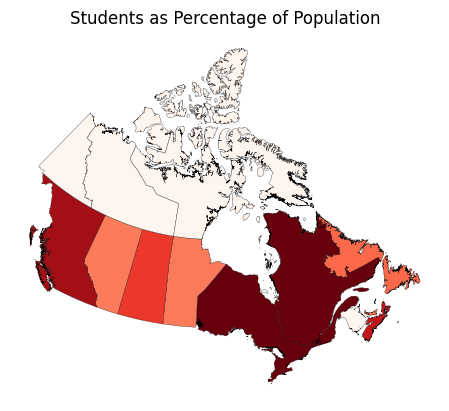

In [148]:
fig, ax = plt.subplots(1, 1)
merged_data.plot(column='percentage', ax=ax,cmap="Reds",missing_kwds={'color': '#fef5ef'},edgecolor="black",linewidth=0.2)
ax.set_title('Students as Percentage of Population')
ax.set_axis_off();

QUESTION NO 3

In [149]:
# Reload Canada shapefile
canada_new = gpd.read_file('canada.shp')
# Load universities data
universities_new = gpd.read_file('universities.geojson')
# Convert universities to same CRS as Canada
uni_new = universities_new.to_crs(epsg=3347)

In [150]:
# Subset of the universities in Southern Ontario
uni_new.astype({"Latitude":'int', "Longitude":'int'})
df_south_ontario = uni_new[((uni_new['Latitude']< 47) & (uni_new['Latitude'] > 42)) & ((uni_new['Longitude']< -76) & (uni_new['Longitude'] > -84))]
bbox = (-84, 42, -76, 47)

In [151]:
polygon_geom = Polygon([(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[3]), (bbox[2], bbox[1])])
canada_new_1 = canada_new.to_crs(epsg=4326)
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
df_subset = gpd.sjoin(canada_new_1, polygon, op='intersects')
df_subset = df_subset[df_subset['Province']=='Ontario']
df_subset1 = df_subset.to_crs(epsg=3347)

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

<ipython-input-151-42891cb38f1e>:5: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs




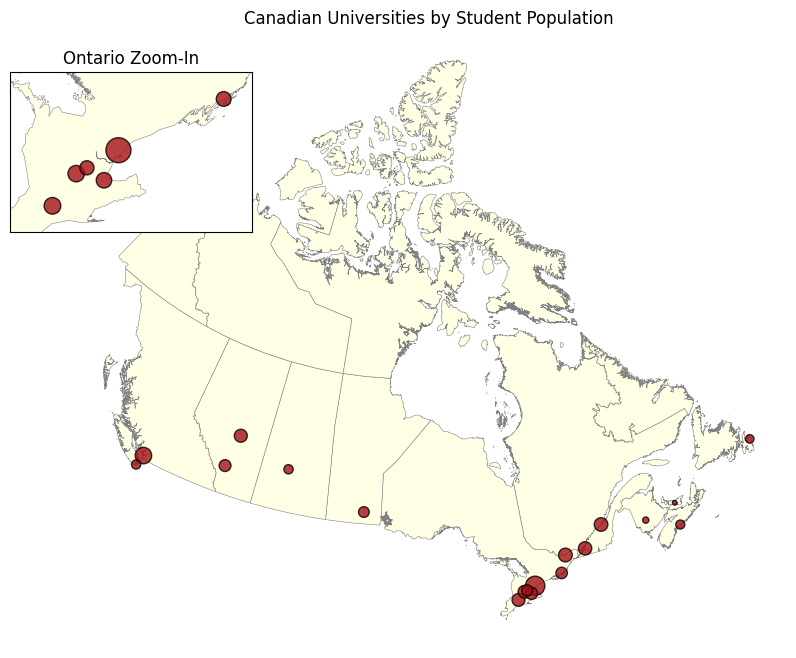

In [159]:
fig,ax1 = plt.subplots(figsize=(14, 8))

canada_new.plot(ax=ax1,color='#FFFFE5', edgecolor='gray', linewidth=0.4)
uni_new.plot(ax=ax1, marker='o',edgecolor='black',  markersize=universities_new['Total students']/500,color='#A50F15', alpha=0.8)
ax1.set_title('Canadian Universities by Student Population')
ax1.set_axis_off()

ax2 = fig.add_axes([0.2, 0.63, 0.2, 0.2])
df_subset1.plot(ax=ax2,color='#FFFFE5', edgecolor='gray',linewidth=0.4)
df_south_ontario.plot(ax=ax2, marker='o', edgecolor='black', markersize=df_south_ontario['Total students']/300,color='#A50F15', alpha=0.8)
ax2.set_xlim((7.0e6,7.5e6))
ax2.set_ylim((0.77e6,1.1e6))

ax2.set_title('Ontario Zoom-In')
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()